First step is some basic data exploration, so load the data and associated libraries.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("HRdata.csv")

print df.head(5)
print df.columns
df.isnull().any()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

The column labels are as follows: satisfaction_level, last_evaluation, number_project, average_monthly_hours, 
time_spend_company, Work_accident, left, promotion_last_5years, sales, and salary. 'Left' is the target variable, and is 1 if the employee has left the company and 0 is the employee is still at the company. The remaining columns are possible features for our model. Two of these features are categorical (sales and salaryj) and will need to be encoded as dummy variables for some machine learning algorithms. The feature 'sales' actually refers to the employee's department.

Also, note that the original dataset has misspelled monthly for average_montly_hours feature. Simple things like this can cause trouble -- trust me. Otherwise, this data set from Kaggle is very clean, with no missing values.

In [6]:
department = df.sales.unique()
department.sort()
print department
salary_unique = df.salary.unique()
salary_unique.sort()
print salary_unique

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
['high' 'low' 'medium']


The department names are as follows: IT, RandD, accounting, hr, management, marketing, product_mng, sales, support, and technical. There are three salary levels: high, medium, and low.

Now, let's take a look at summary statistics.

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


There are 14999 employee observations. 23.81% of the employees have left the company, while 76.19 are remaining. When we split the data for training & testing, we will want to maintain this ratio. There are nine features we can potentially use for our model. Now let's look at some of the histograms to get a feel for how the data is distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D19C2E8>]], dtype=object)

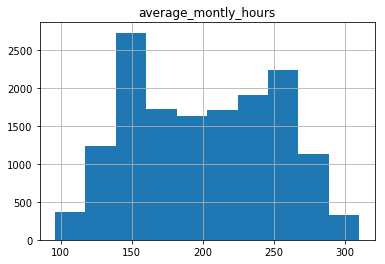

In [8]:
df.hist(column='average_montly_hours')

This data appears bimodal, with peaks at 150 hours and 250 hours. The minimum was 96 and maximum was 310.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC9FEB8>]], dtype=object)

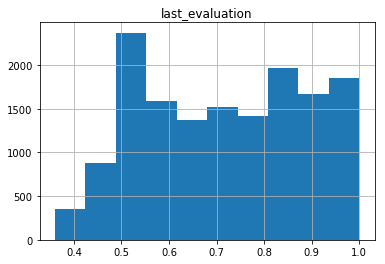

In [9]:
df.hist(column='last_evaluation')

There is a peak at 0.5, an almost uniform distribution between .5-.8, then a larger grouping between .8-1.0. While a majority of employees may receive an evaluation > .5, the most widely received score is approximately 0.5. The minimum evaluation was .36 and the maximum was 1.0; the mean was .716.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DCD87B8>]], dtype=object)

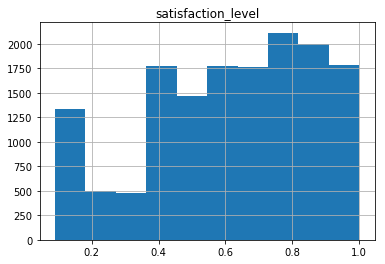

In [10]:
df.hist(column='satisfaction_level')

There is a peak around 0.1 but then it drops off between .2-.4. It then rises to a fairly uniform distribution between .4-1. This indicates that the unsatisfied employees feel strongly (very low rating), as if once you fall below neutral (.5), you are much more likely to rate your satisfaction as 0.1 than 0.4. The minimum satisfaction level was 0.09 and the maximum was 1.0.

The underlying hypothesis to this project is that there is a difference between the employees who leave versus those who are still employed by the company. Let's separate the data on that target and observe if we can see any differences. 

In [11]:
dfleft, dfstay = [x for _, x in df.groupby(df["left"]==0)]
dfleft.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [12]:
dfstay.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


A quick glance at the summary statistics of the two groups shows a difference in the mean satisfaction level of the two groups. For the employees that have left, their mean satisfaction level was only .440, while it was .667 for the employees still at the company. Another area of difference may be in the number of projects. The group of employees that left had a higher percentage of people with 6 or more projects, and max of 7. The employees who remain had a max of 6 projects.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E36D3C8>]], dtype=object)

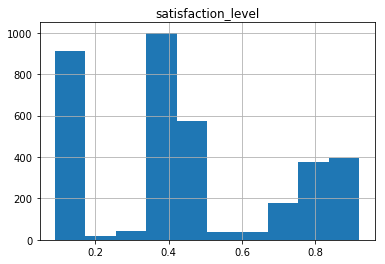

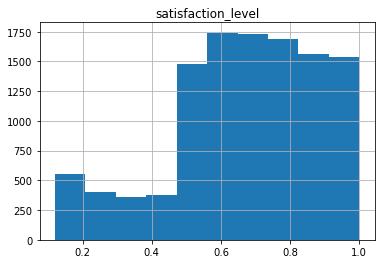

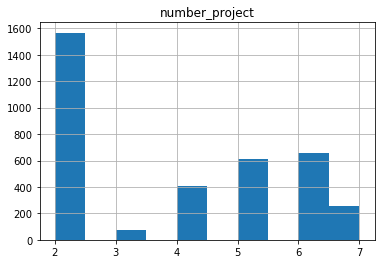

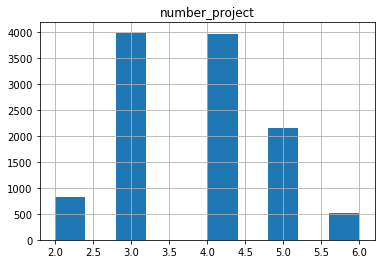

In [13]:
dfleft.hist(column='satisfaction_level')
dfstay.hist(column='satisfaction_level')
dfleft.hist(column='number_project')
dfstay.hist(column='number_project')

These quick visualizations indicate that there are differences between the two groups. Can we find a machine learning model to help us predict which employees are most likely to leave?

Before we begin testing algorithms, the data needs to be prepared. There are two categorical variables: sales (which represents the employees' department) and salary. Simply replacing the department name with a number could imply a value or ranking, so I choose to use one hot encoding for that feature. This will create additional columns, but with a data set of this size, it should not an issue for training.

In [14]:
cols_to_transform = ['salary', 'sales']
df = pd.get_dummies(df, columns = cols_to_transform )
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


The next step is to split our data into training and test sets, 

In [15]:
from sklearn.cross_validation import train_test_split
X = df.drop('left', axis=1)
Y = df['left']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=5, stratify=Y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Although decision trees and random forest models do not require features to be on the same scale, most machine learning algorithms perform better is features are on the same scale (Raschka, 2015). Therefore, I will use standardization for feature scaling. This function subtracts the feature's mean from each value, and divides by the feature's standard deviation. This centers all features around a mean of 0, with and standard deviation of 1. 

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Now we are ready for model building. First up is the classic: logistic regression.

In [20]:
from sklearn import linear_model, metrics, linear_model
logit = linear_model.LogisticRegression()
logit.fit(X_train_std, Y_train)
Y_pred = logit.predict(X_test_std)
logit_score_train = logit.score(X_train_std, Y_train)
print("Training score: ",logit_score_train)
logit_score_test = logit.score(X_test_std, Y_test)
print("Testing score: ",logit_score_test)
print("F1: %2f" % metrics.f1_score(Y_test, Y_pred, average="macro"))

('Training score: ', 0.79364947078923243)
('Testing score: ', 0.80666666666666664)
F1: 0.687201


The linear regression model was slightly more accurate than the base model, which assumes we predict everyone will stay. On the entire population data, this would yield an accuracy of .7619. However, the weighted metric of F1-score is only .687. We will now try other models to attempt to improve this metric. I have chosen random forest, SVM, and k-nearest neighbors to model this data.

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=3)
rfc.fit(X_train_std, Y_train)
Y_pred = rfc.predict(X_test_std)
rfc_score_train = rfc.score(X_train_std, Y_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(X_test_std, Y_test)
print("Testing score: ",rfc_score_test)
print("F1: %2f" % metrics.f1_score(Y_test, Y_pred, average="macro"))

('Training score: ', 0.99849987498958248)
('Testing score: ', 0.98899999999999999)
F1: 0.984711


In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_std, Y_train)
Y_pred = svm.predict(X_test_std)
svm_score_train = svm.score(X_train_std, Y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test_std, Y_test)
print("Testing score: ",svm_score_test)
print("F1: %2f" % metrics.f1_score(Y_test, Y_pred, average="macro"))

('Training score: ', 0.95324610384198682)
('Testing score: ', 0.95066666666666666)
F1: 0.932511


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_std, Y_train)
Y_pred = knn.predict(X_test_std)
knn_score_train = knn.score(X_train_std, Y_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(X_test_std, Y_test)
print("Testing score: ",knn_score_test)
print("F1: %2f" % metrics.f1_score(Y_test, Y_pred, average="macro"))

('Training score: ', 0.96033002750229191)
('Testing score: ', 0.94133333333333336)
F1: 0.920710


The reported F1 scores for each of the algorithms was:
 - Linear regression - .6872
 - Random forest - .9847
 - Support vector machines - .9325
 - K-nearest neighbors - .9207
    
Of the 4 model algorithms tested, Random Forest performed best against the F1 evaluation metric. Let's see which features were most important in the classification.

In [53]:
rfc.feature_importances_

array([ 0.35333943,  0.12529173,  0.13626722,  0.15652285,  0.18065515,
        0.00722358,  0.00120929,  0.00790563,  0.00524441,  0.00406563,
        0.00181228,  0.0013881 ,  0.00202026,  0.00153358,  0.00159659,
        0.00151177,  0.00117954,  0.00354804,  0.00329607,  0.00438884])

Satisfaction level accounted for 35.33% of the importance in predicting whether an employee would leave. This complements what we might have intuitively known. The next most important features were time spent at the company (18.07%) and average monthly hours (15.65%). Promotion, salary, and department did not contribute greatly to the random forest model.

Since random forest appears to have the best performance on this data set, I will work on tuning hyperparameters to improved performance. Although, admittedly, and F1 score is very good for an out-of-the box first attempt. There are basically three hyperparameters we can tweak to improve predictive metrics: 1) the maximum number of features to be used in the model, particularly useful when there are a large number of features with very small contributions, 2) the number of trees to be used in the random forest model, useful when a very large data set has long training times, and 3) minimum sample leaf size, which limits the minimum size of an end node. I will do a randomized search on 1 and 3.

In [30]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9)}
n_iter_search = 20
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(X_train_std, Y_train)
random_search.best_score_
random_search.best_params_

{'max_features': 4, 'min_samples_leaf': 1}

Now I will rerun the random forest model using a maximum of 4 features. Since the default minimum samples per leaf is one, no additional specification is needed.

In [37]:
rfc_opt = RandomForestClassifier(random_state=3, max_features=4)
rfc_opt.fit(X_train_std, Y_train)
Y_pred = rfc_opt.predict(X_test_std)
rfc_opt_score_train = rfc_opt.score(X_train_std, Y_train)
print("Training score: ",rfc_opt_score_train)
rfc_opt_score_test = rfc_opt.score(X_test_std, Y_test)
print("Testing score: ",rfc_opt_score_test)
print("F1: %2f" % metrics.f1_score(Y_test, Y_pred, average="macro"))

('Training score: ', 0.99849987498958248)
('Testing score: ', 0.98899999999999999)
F1: 0.984711


No performance gain is seen but this is not terribly surprising given the size of the data.